# Data Analysis - Time Series

In [1]:
import pandas as pd
import numpy as np

from datetime import datetime, timedelta

## Date and Time Data Types and Tools

In [2]:
now = datetime.now()
now

datetime.datetime(2022, 4, 5, 13, 2, 38, 577228)

In [3]:
now.year, now.month, now.day # get todays year, month and day

(2022, 4, 5)

`timedelta` represents temporal difference between two datetime objects.

In [4]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta, delta.days, delta.seconds

(datetime.timedelta(days=926, seconds=56700), 926, 56700)

In [5]:
start = datetime(2011, 1, 7)
start + timedelta(12) # add 12 days

datetime.datetime(2011, 1, 19, 0, 0)

In [6]:
start - 2 * timedelta(12) # start - timedelta(24)

datetime.datetime(2010, 12, 14, 0, 0)

### Converting Between String and Datetime

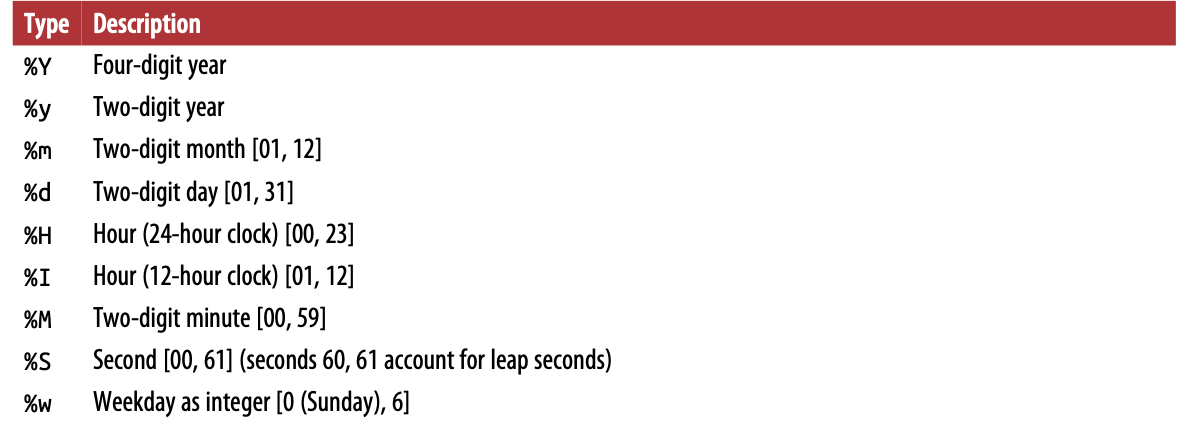
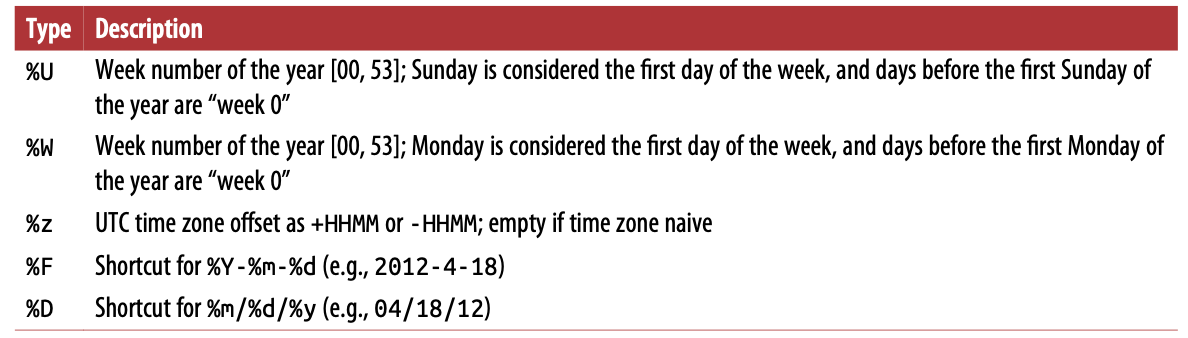

In [7]:
stamp = datetime(2011, 1, 3)

In [8]:
str(stamp) # no format

'2011-01-03 00:00:00'

In [9]:
stamp.strftime('%Y-%m-%d') # convert to string format (with formatting)

'2011-01-03'

In [10]:
stamp.strftime('%F') # shortcut for above

'2011-01-03'

In [11]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d') # string to date

datetime.datetime(2011, 1, 3, 0, 0)

In [12]:
datestrs = ['7/6/2011', '8/6/2011']

[datetime.strptime(x, '%m/%d/%Y') for x in datestrs] # string to date

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

`datetime.strptime` is a good way to parse a date with a known format. However, it can be a bit annoying to have to write a format spec each time, especially for common date formats. In this case, you can use the `parser.parse` method in the third-party `dateutil` package (this is installed automatically when you install pandas).

In [13]:
from dateutil.parser import parse

parse('2011-01-03') # much more efficient than strptime

datetime.datetime(2011, 1, 3, 0, 0)

In [14]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [15]:
parse('6/12/2011', dayfirst=True) # international locales dates are day appearing before month

datetime.datetime(2011, 12, 6, 0, 0)

In [16]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs) # parses many different kinds of date representations

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [17]:
idx = pd.to_datetime(datestrs + [None]) # also handles NA values
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [18]:
idx[2]

NaT

In [19]:
pd.isnull(idx)

array([False, False,  True])

## Time Series Basics

In [20]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.027438
2011-01-05    0.376577
2011-01-07    0.862061
2011-01-08    0.135703
2011-01-10   -1.375448
2011-01-12    0.691021
dtype: float64

In [21]:
ts.index # under the hood, these datetime objects have been put in a DatetimeIndex

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [22]:
ts + ts[::2]

2011-01-02   -0.054876
2011-01-05         NaN
2011-01-07    1.724122
2011-01-08         NaN
2011-01-10   -2.750896
2011-01-12         NaN
dtype: float64

In [23]:
ts.index.dtype # pandas stores timestamps using Numpy's datetime64 data type at the nanosecond resolution

dtype('<M8[ns]')

In [24]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### Indexing, Selection, Subsetting

In [25]:
stamp = ts.index[2]
ts[stamp]

0.8620608775708394

In [26]:
ts['1/10/2011'] # can also pass a string that is interpretable as a date

-1.3754481986794416

In [27]:
ts['20110110']

-1.3754481986794416

In [28]:
longer_ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01   -0.981085
2000-01-02   -0.770359
2000-01-03    0.446549
2000-01-04   -0.962273
2000-01-05    0.748826
                ...   
2002-09-22    1.349203
2002-09-23    1.990613
2002-09-24   -0.103190
2002-09-25   -1.139477
2002-09-26    0.014969
Freq: D, Length: 1000, dtype: float64

In [29]:
longer_ts['2001'] # slices of data which is in the year of 2001

2001-01-01    0.738003
2001-01-02   -0.928395
2001-01-03   -0.621188
2001-01-04    1.507441
2001-01-05   -2.116253
                ...   
2001-12-27   -0.697933
2001-12-28   -0.343194
2001-12-29    0.050970
2001-12-30    0.634439
2001-12-31    1.801671
Freq: D, Length: 365, dtype: float64

In [30]:
longer_ts['2001-05'] # works also with months

2001-05-01   -0.032534
2001-05-02   -1.416094
2001-05-03    0.859213
2001-05-04    1.302507
2001-05-05    1.558092
2001-05-06    1.328636
2001-05-07   -0.093491
2001-05-08    1.458886
2001-05-09    2.381820
2001-05-10   -2.140879
2001-05-11   -0.009036
2001-05-12   -1.110485
2001-05-13    0.829365
2001-05-14    1.137752
2001-05-15   -1.209489
2001-05-16   -0.325915
2001-05-17    0.188571
2001-05-18   -1.604951
2001-05-19    1.023066
2001-05-20   -0.946767
2001-05-21   -0.307654
2001-05-22   -0.432807
2001-05-23   -1.165265
2001-05-24    0.369789
2001-05-25    0.095049
2001-05-26    0.610192
2001-05-27    0.795055
2001-05-28    1.390132
2001-05-29   -0.380156
2001-05-30    1.410182
2001-05-31   -0.703933
Freq: D, dtype: float64

In [31]:
ts

2011-01-02   -0.027438
2011-01-05    0.376577
2011-01-07    0.862061
2011-01-08    0.135703
2011-01-10   -1.375448
2011-01-12    0.691021
dtype: float64

In [32]:
ts[datetime(2011, 1, 7):]

2011-01-07    0.862061
2011-01-08    0.135703
2011-01-10   -1.375448
2011-01-12    0.691021
dtype: float64

In [33]:
ts['1/6/2011':'1/11/2011']

2011-01-07    0.862061
2011-01-08    0.135703
2011-01-10   -1.375448
dtype: float64

In [34]:
ts.truncate(after='1/9/2011') # take index dates before 1/9/2011

2011-01-02   -0.027438
2011-01-05    0.376577
2011-01-07    0.862061
2011-01-08    0.135703
dtype: float64

In [35]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4), index=dates, columns=['Colorado', 'Texas', 'New York', 'Ohio'])
long_df

,Colorado,Texas,New York,Ohio
2000-01-05,-0.488205,-0.618251,-1.079998,0.387566
2000-01-12,0.642656,-0.010476,0.829086,-1.213394
2000-01-19,-0.254810,1.024923,-0.060538,0.377742
2000-01-26,-0.918750,2.055671,0.527863,-0.059546
2000-02-02,0.486481,-0.488681,1.575744,-0.107909
...,...,...,...,...
2001-10-31,-0.295693,-0.464623,-1.420008,1.022663
2001-11-07,-0.398166,0.401405,0.203044,-1.109734
2001-11-14,-0.377594,0.838294,-0.590059,0.770262
2001-11-21,-0.181657,-0.612827,-1.230349,1.090218


In [36]:
long_df.loc['5-2001'] # indexing on its rows for a DataFrame

,Colorado,Texas,New York,Ohio
2001-05-02,-1.168541,-1.167001,1.167926,-0.929637
2001-05-09,0.106659,-0.296363,-0.362834,-0.027486
2001-05-16,0.500047,-1.722978,1.577650,1.312653
2001-05-23,0.422799,0.818734,-1.013088,-0.726052
2001-05-30,0.691020,-0.213864,-0.806524,-0.364003


### Time Series with Duplicate Indices

In [37]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000','1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [38]:
dup_ts.index.is_unique # tell if the index is not unique (no dupes)

False

In [39]:
dup_ts['1/3/2000'] # not a dupe

4

In [40]:
dup_ts['1/2/2000'] # dupe

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [41]:
dup_ts.groupby(level=0).count() # count values

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## Date Ranges, Frequencies, and Shifting

In [42]:
ts

2011-01-02   -0.027438
2011-01-05    0.376577
2011-01-07    0.862061
2011-01-08    0.135703
2011-01-10   -1.375448
2011-01-12    0.691021
dtype: float64

In [43]:
resampler = ts.resample('D') # D is inferred as daily frequency

### Generating Date Ranges

In [44]:
index = pd.date_range('2012-04-01', '2012-06-01') # passing start and end date
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [45]:
pd.date_range(start='2012-04-01', periods=20) # start and periods to generate

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [46]:
pd.date_range(end='2012-06-01', periods=20) # goes back 20 days

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [47]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM') # last business/weekday day of each month

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [48]:
pd.date_range('2012-05-02 12:56:31', periods=5) # preserves timestamp if provided

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [49]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets

In [50]:
from pandas.tseries.offsets import Hour, Minute

In [51]:
hour = Hour()
hour

<Hour>

In [52]:
four_hours = Hour(4) # date offset
four_hours

<4 * Hours>

In [53]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h') # generate date every 4 hrs

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [54]:
Hour(2) + Minute(30) # combining date offsets

<150 * Minutes>

In [55]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

#### Week of month dates

In [56]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI') # weeks of month, get dates like the third Friday of each month
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### Shifting (Leading and Lagging) Data

Shifting refers to moving data backward and forward through time.

In [57]:
ts = pd.Series(np.random.randn(4), index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31   -0.286015
2000-02-29   -0.029207
2000-03-31    0.234331
2000-04-30    1.916599
Freq: M, dtype: float64

In [58]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.286015
2000-04-30   -0.029207
Freq: M, dtype: float64

In [59]:
ts.shift(-2)

2000-01-31    0.234331
2000-02-29    1.916599
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [60]:
ts.shift(2, freq='M') # replaces NA values with advance timestamps

2000-03-31   -0.286015
2000-04-30   -0.029207
2000-05-31    0.234331
2000-06-30    1.916599
Freq: M, dtype: float64

In [61]:
ts.shift(3, freq='D')

2000-02-03   -0.286015
2000-03-03   -0.029207
2000-04-03    0.234331
2000-05-03    1.916599
dtype: float64

In [62]:
ts.shift(1, freq='90T') # T -> minutes

2000-01-31 01:30:00   -0.286015
2000-02-29 01:30:00   -0.029207
2000-03-31 01:30:00    0.234331
2000-04-30 01:30:00    1.916599
dtype: float64

#### Shifting dates with offsets

In [63]:
from pandas.tseries.offsets import Day, MonthEnd

In [64]:
now = datetime(2011, 11, 17)
now + 3 * Day() # adds 3 days

Timestamp('2011-11-20 00:00:00')

In [65]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [66]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [67]:
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [68]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [69]:
ts = pd.Series(np.random.randn(20), index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15    0.277227
2000-01-19    0.755948
2000-01-23    0.803420
2000-01-27    0.504652
2000-01-31    0.405991
2000-02-04    0.327504
2000-02-08   -2.070094
2000-02-12    0.409452
2000-02-16    0.698002
2000-02-20   -1.696329
2000-02-24    0.349826
2000-02-28   -1.182113
2000-03-03    0.736754
2000-03-07    0.644804
2000-03-11   -0.514883
2000-03-15    0.247377
2000-03-19   -1.538406
2000-03-23   -0.686197
2000-03-27    1.941149
2000-03-31   -1.407306
Freq: 4D, dtype: float64

In [70]:
ts.groupby(offset.rollforward).mean() # creative use of offsetting

2000-01-31    0.549448
2000-02-29   -0.451965
2000-03-31   -0.072089
dtype: float64

In [71]:
ts.resample('M').mean() # an easier way than above

2000-01-31    0.549448
2000-02-29   -0.451965
2000-03-31   -0.072089
Freq: M, dtype: float64

## Time Zone Handling

In [72]:
import pytz

In [73]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [74]:
tz = pytz.timezone('America/New_York') # get timezone object
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### Time Zone Localization and Conversion

In [75]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -0.549688
2012-03-10 09:30:00   -0.751672
2012-03-11 09:30:00    1.195213
2012-03-12 09:30:00   -0.029509
2012-03-13 09:30:00   -0.684646
2012-03-14 09:30:00    0.906243
Freq: D, dtype: float64

In [76]:
print(ts.index.tz)

None


In [77]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC') # generate dates with time zone

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [78]:
ts

2012-03-09 09:30:00   -0.549688
2012-03-10 09:30:00   -0.751672
2012-03-11 09:30:00    1.195213
2012-03-12 09:30:00   -0.029509
2012-03-13 09:30:00   -0.684646
2012-03-14 09:30:00    0.906243
Freq: D, dtype: float64

In [79]:
ts_utc = ts.tz_localize('UTC') # localized to UTC
ts_utc

2012-03-09 09:30:00+00:00   -0.549688
2012-03-10 09:30:00+00:00   -0.751672
2012-03-11 09:30:00+00:00    1.195213
2012-03-12 09:30:00+00:00   -0.029509
2012-03-13 09:30:00+00:00   -0.684646
2012-03-14 09:30:00+00:00    0.906243
Freq: D, dtype: float64

In [80]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [81]:
ts_utc.tz_convert('America/New_York') # converts to NY timezone

2012-03-09 04:30:00-05:00   -0.549688
2012-03-10 04:30:00-05:00   -0.751672
2012-03-11 05:30:00-04:00    1.195213
2012-03-12 05:30:00-04:00   -0.029509
2012-03-13 05:30:00-04:00   -0.684646
2012-03-14 05:30:00-04:00    0.906243
Freq: D, dtype: float64

In [82]:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -0.549688
2012-03-10 14:30:00+00:00   -0.751672
2012-03-11 13:30:00+00:00    1.195213
2012-03-12 13:30:00+00:00   -0.029509
2012-03-13 13:30:00+00:00   -0.684646
2012-03-14 13:30:00+00:00    0.906243
dtype: float64

In [83]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.549688
2012-03-10 15:30:00+01:00   -0.751672
2012-03-11 14:30:00+01:00    1.195213
2012-03-12 14:30:00+01:00   -0.029509
2012-03-13 14:30:00+01:00   -0.684646
2012-03-14 14:30:00+01:00    0.906243
dtype: float64

In [84]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

### Operations with Time Zone−Aware Timestamp Objects

In [85]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [86]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [87]:
stamp_utc.value # timestamp in nanoseconds since Unix epoch (Jan 1 1970)

1299902400000000000

In [88]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

In [89]:
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [90]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [91]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [92]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### Operations Between Different Time Zones

In [93]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00   -0.668748
2012-03-08 09:30:00    1.727665
2012-03-09 09:30:00    1.324028
2012-03-12 09:30:00    0.546722
2012-03-13 09:30:00   -2.864388
2012-03-14 09:30:00   -0.245622
2012-03-15 09:30:00   -0.294570
2012-03-16 09:30:00   -2.162726
2012-03-19 09:30:00   -0.506647
2012-03-20 09:30:00   -0.472295
Freq: B, dtype: float64

In [94]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')

In [95]:
ts1

2012-03-07 09:30:00+00:00   -0.668748
2012-03-08 09:30:00+00:00    1.727665
2012-03-09 09:30:00+00:00    1.324028
2012-03-12 09:30:00+00:00    0.546722
2012-03-13 09:30:00+00:00   -2.864388
2012-03-14 09:30:00+00:00   -0.245622
2012-03-15 09:30:00+00:00   -0.294570
dtype: float64

In [96]:
ts2

2012-03-09 13:30:00+04:00    1.324028
2012-03-12 13:30:00+04:00    0.546722
2012-03-13 13:30:00+04:00   -2.864388
2012-03-14 13:30:00+04:00   -0.245622
2012-03-15 13:30:00+04:00   -0.294570
dtype: float64

In [97]:
result = ts1 + ts2
result

2012-03-07 09:30:00+00:00         NaN
2012-03-08 09:30:00+00:00         NaN
2012-03-09 09:30:00+00:00    2.648057
2012-03-12 09:30:00+00:00    1.093445
2012-03-13 09:30:00+00:00   -5.728776
2012-03-14 09:30:00+00:00   -0.491245
2012-03-15 09:30:00+00:00   -0.589140
dtype: float64

In [98]:
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

## Periods and Period Arithmetic

In [99]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [100]:
p + 5

Period('2012', 'A-DEC')

In [101]:
p - 2

Period('2005', 'A-DEC')

In [102]:
pd.Period('2014', freq='A-DEC') - p # difference between

<7 * YearEnds: month=12>

In [103]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [104]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -2.215771
2000-02   -0.052636
2000-03    1.757323
2000-04    0.353467
2000-05   -0.285017
2000-06   -0.657366
Freq: M, dtype: float64

In [105]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

### Period Frequency Conversion

In [106]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [107]:
p.asfreq('M', how='start') # get first next month

Period('2007-01', 'M')

In [108]:
p.asfreq('M', how='end') # get the last month (before a year)

Period('2007-12', 'M')

In [109]:
p = pd.Period('2007', freq='A-JUN')
p

Period('2007', 'A-JUN')

In [110]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [111]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [112]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [113]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006   -0.871276
2007   -0.117426
2008   -0.884598
2009   -0.074688
Freq: A-DEC, dtype: float64

In [114]:
ts.asfreq('M', how='start')

2006-01   -0.871276
2007-01   -0.117426
2008-01   -0.884598
2009-01   -0.074688
Freq: M, dtype: float64

In [115]:
ts.asfreq('B', how='end') # last business/weekday day of each year

2006-12-29   -0.871276
2007-12-31   -0.117426
2008-12-31   -0.884598
2009-12-31   -0.074688
Freq: B, dtype: float64

### Quarterly Period Frequencies

In [116]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [117]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [118]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [119]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm, p4pm.to_timestamp()

(Period('2012-01-30 16:00', 'T'), Timestamp('2012-01-30 16:00:00'))

In [120]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [121]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

### Converting Timestamps to Periods (and Back)

In [122]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31    0.091506
2000-02-29   -0.121954
2000-03-31   -1.439189
Freq: M, dtype: float64

In [123]:
pts = ts.to_period() # timestamps to periods
pts

2000-01    0.091506
2000-02   -0.121954
2000-03   -1.439189
Freq: M, dtype: float64

In [124]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29    1.674355
2000-01-30   -0.894009
2000-01-31    0.373192
2000-02-01   -1.195978
2000-02-02    0.058791
2000-02-03   -0.339367
Freq: D, dtype: float64

In [125]:
ts2.to_period('M')

2000-01    1.674355
2000-01   -0.894009
2000-01    0.373192
2000-02   -1.195978
2000-02    0.058791
2000-02   -0.339367
Freq: M, dtype: float64

In [126]:
pts = ts2.to_period()
pts

2000-01-29    1.674355
2000-01-30   -0.894009
2000-01-31    0.373192
2000-02-01   -1.195978
2000-02-02    0.058791
2000-02-03   -0.339367
Freq: D, dtype: float64

In [127]:
pts.to_timestamp(how='end') # convert back to timestamps

2000-01-29 23:59:59.999999999    1.674355
2000-01-30 23:59:59.999999999   -0.894009
2000-01-31 23:59:59.999999999    0.373192
2000-02-01 23:59:59.999999999   -1.195978
2000-02-02 23:59:59.999999999    0.058791
2000-02-03 23:59:59.999999999   -0.339367
Freq: D, dtype: float64

### Creating a PeriodIndex from Arrays

In [128]:
data = pd.read_csv('examples/macrodata.csv')
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [129]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [130]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [131]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC') # form PeriodIndex
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [132]:
data.index = index

In [133]:
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## Resampling and Frequency Conversion

*Resampling* refers to the process of converting a time series from one frequency to another. Aggregating higher frequency data to lower frequency data is called *downsampling*, while converting lower frequency to higher frequency is called *upsampling*.

For example, converting `W-WED` (weekly on Wednesday) to `W-FRI` is neither upsampling nor downsampling.

`resample` is a flexible and high-performance method that can be used to process very large time series.

In [134]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01   -0.145257
2000-01-02    0.242144
2000-01-03   -0.683266
2000-01-04   -0.662582
2000-01-05    1.483915
                ...   
2000-04-05    0.585107
2000-04-06    0.202639
2000-04-07   -0.523111
2000-04-08   -0.700930
2000-04-09   -0.009307
Freq: D, Length: 100, dtype: float64

In [135]:
ts.resample('M').mean()

2000-01-31    0.370968
2000-02-29   -0.255718
2000-03-31   -0.105016
2000-04-30    0.434514
Freq: M, dtype: float64

In [136]:
ts.resample('M', kind='period').mean()

2000-01    0.370968
2000-02   -0.255718
2000-03   -0.105016
2000-04    0.434514
Freq: M, dtype: float64

### Downsampling

In [137]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [138]:
ts.resample('5min', closed='right').sum() # aggregating into five minute chunks or bars by taking the sum of each group

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [139]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [140]:
ts.resample('5min', closed='right', label='right', loffset='-1s').sum() # shift by one second from right edge

/var/folders/95/xpt3ys8s7fv9t6dthp70b0qr0000gn/T/ipykernel_10125/3596501970.py:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  ts.resample('5min', closed='right', label='right', loffset='-1s').sum() # shift by one second from right edge


1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

#### Open-High-Low-Close (OHLC) resampling

In [141]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### Upsampling and Interpolation


In [142]:
frame = pd.DataFrame(np.random.randn(2, 4),
        index=pd.date_range('1/1/2000', periods=2, freq='W-WED'), 
        columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.803676,1.113161,0.095830,1.115720
2000-01-12,-0.635286,-0.544249,-0.215213,-0.437856


In [143]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,0.803676,1.113161,0.095830,1.115720
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.635286,-0.544249,-0.215213,-0.437856


In [144]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,0.803676,1.113161,0.095830,1.115720
2000-01-06,0.803676,1.113161,0.095830,1.115720
2000-01-07,0.803676,1.113161,0.095830,1.115720
2000-01-08,0.803676,1.113161,0.095830,1.115720
2000-01-09,0.803676,1.113161,0.095830,1.115720
2000-01-10,0.803676,1.113161,0.095830,1.115720
2000-01-11,0.803676,1.113161,0.095830,1.115720
2000-01-12,-0.635286,-0.544249,-0.215213,-0.437856


In [145]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,0.803676,1.113161,0.095830,1.115720
2000-01-06,0.803676,1.113161,0.095830,1.115720
2000-01-07,0.803676,1.113161,0.095830,1.115720
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.635286,-0.544249,-0.215213,-0.437856


In [146]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,0.803676,1.113161,0.095830,1.115720
2000-01-13,-0.635286,-0.544249,-0.215213,-0.437856


### Resampling with Periods

In [147]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001', freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,-1.153118,0.482271,0.753694,0.790197
2000-02,0.648904,-0.643851,1.590296,-1.115226
2000-03,-0.571688,-1.015980,-0.766487,-0.161508
2000-04,0.107198,0.703825,1.793518,-0.401471
2000-05,0.140290,-0.657814,-0.838785,-1.067272


In [148]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.592754,0.147395,0.364473,-0.120084
2001,-0.038219,0.024280,0.168813,0.163071


In [149]:
annual_frame.resample('Q-DEC').ffill() # Q-DEC: Quarterly, year ending in December

,Colorado,Texas,New York,Ohio
2000Q1,-0.592754,0.147395,0.364473,-0.120084
2000Q2,-0.592754,0.147395,0.364473,-0.120084
2000Q3,-0.592754,0.147395,0.364473,-0.120084
2000Q4,-0.592754,0.147395,0.364473,-0.120084
2001Q1,-0.038219,0.024280,0.168813,0.163071
2001Q2,-0.038219,0.024280,0.168813,0.163071
2001Q3,-0.038219,0.024280,0.168813,0.163071
2001Q4,-0.038219,0.024280,0.168813,0.163071


In [150]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.592754,0.147395,0.364473,-0.120084
2001Q1,-0.592754,0.147395,0.364473,-0.120084
2001Q2,-0.592754,0.147395,0.364473,-0.120084
2001Q3,-0.592754,0.147395,0.364473,-0.120084
2001Q4,-0.038219,0.024280,0.168813,0.163071


In [151]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.592754,0.147395,0.364473,-0.120084
2001Q1,-0.592754,0.147395,0.364473,-0.120084
2001Q2,-0.592754,0.147395,0.364473,-0.120084
2001Q3,-0.592754,0.147395,0.364473,-0.120084
2001Q4,-0.038219,0.024280,0.168813,0.163071
2002Q1,-0.038219,0.024280,0.168813,0.163071
2002Q2,-0.038219,0.024280,0.168813,0.163071
2002Q3,-0.038219,0.024280,0.168813,0.163071


## Moving Window Functions

An important class of array transformations used for time series operations are statis‐ tics and other functions evaluated over a sliding window or with exponentially decay‐ ing weights. This can be useful for smoothing noisy or gappy data. I call these moving window functions, even though it includes functions without a fixed-length window like exponentially weighted moving average. Like other statistical functions, these also automatically exclude missing data.

In [152]:
close_px_all = pd.read_csv('examples/stock_px_2.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


In [153]:
close_px = close_px.resample('B').ffill()
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


<AxesSubplot:>

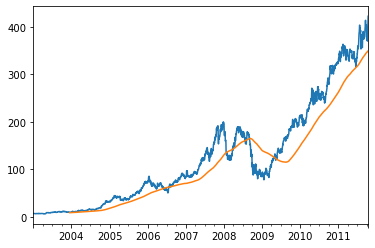

In [154]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot() # rolling 250 is similiar to groupby, instead it creates over a 250-day sliding window

In [155]:
aapl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
aapl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

<AxesSubplot:>

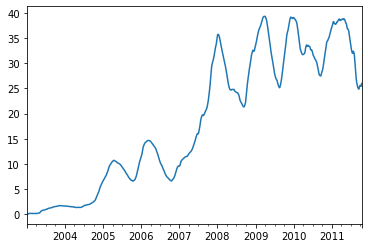

In [156]:
aapl_std250.plot()

In [157]:
expanding_mean = aapl_std250.expanding().mean()

<AxesSubplot:>

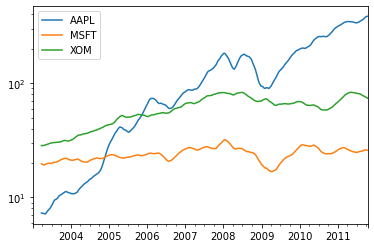

In [158]:
close_px.rolling(60).mean().plot(logy=True)

In [159]:
close_px.rolling('20D').mean() # 20 day rolling

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### Exponentially Weighted Functions

An alternative to using a static window size with equally weighted observations is to specify a constant decay factor to give more weight to more recent observations.

In [160]:
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()

<AxesSubplot:>

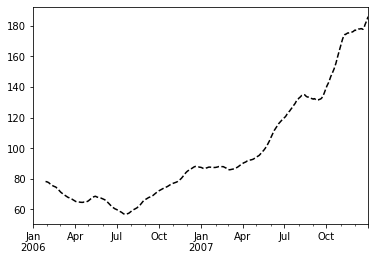

In [161]:
ma60.plot(style='k--', label='Simple MA')

<AxesSubplot:>

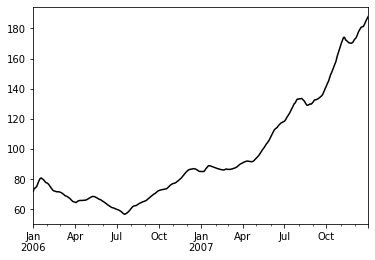

In [162]:
ewma60.plot(style='k-', label='EW MA')

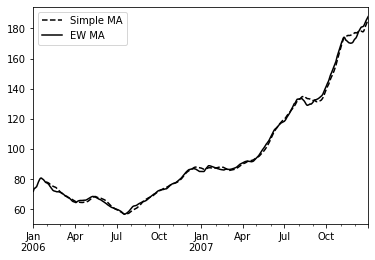

In [163]:
import matplotlib.pyplot as plt
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()

### Binary Moving Window Functions


In [164]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

<AxesSubplot:>

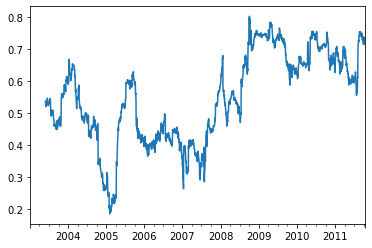

In [165]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot() # Six-month AAPL return correlation to S&P 500

<AxesSubplot:>

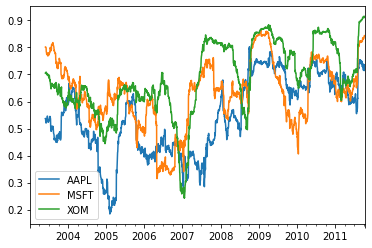

In [166]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot() # Six-month return correlations to S&P 500

### User-Defined Moving Window Functions


In [ ]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot() # Percentile rank of 2% AAPL return over one-year window